### Feature Engineering
We will now learn about **feature engineering** which is the process of building new features from existing ones. There are many different ways to extend the set of features, and we will start by discussing **polynomial features** which is at the basis of polynomial regressions. We will then present other feature engineering techniques and illustrate logarithmic transformations with the Boston housing data set.

### Polyfit revisited
function models the relationship between a single input variable 
x
 and a target variable 
y
 by fitting the equation of a polynomial of degree 
p
.

^
y
=
w
0
+
w
1
x
+
w
2
x
2
+
w
3
x
3
+
…
+
w
p
x
p
This is also called a polynomial regression. Intuitively, the formula seems different than the linear regression one because it involves powers of 
x
. However, there is a little trick. The 
x
 variable is known when fitting the model. Hence, we can create new features from it. In particular, we can generate a feature for each power in the equation from above.
 
 We can now use this new list of features 
z
 and rewrite the equation.
 
z=[x,x2,x3,…,xp]

^
y
=
w
0
+
w
1
z
1
+
w
2
z
2
+
w
3
z
3
+
…
+
w
p
z
p
As we can see, each feature 
z
i
 is associated with a coefficient 
w
i
, and the formula corresponds to a linear regression one. In other words, by fitting a linear regression to the polynomial features in 
z
, we obtain the coefficients of the polynomial equation from above.

### Augmenting the input
Creating new features from existing ones is called feature engineering. The idea is to build an extended set of features **to improve the performance of our models.** There are many ways to create new features.

- Combine numerical variables - windspeed * humidity
- Combine binary variables - weekend and sunny
- Create indicator variables - windspeed > mean(windspeed)
- Applying transformations - log(x), sqrt(x), polynomial features
- Other functions - max(x1, x2), distance(x1, x2)

Building meaningful features is not an easy task and **requires domain knowledge.** However, it's often critical to the success of a machine learning project. Here is a quote from the famous paper "A Few Useful Things to Know about Machine Learning":

"*At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used. If you have many independent features that each correlate well with the class, learning is easy. On the other hand, if the class is a very complex function of the features, you may not be able to learn it. Often, the raw data is not in a form that is amenable to learning, but you can construct features from it that are. This is typically where most of the effort in a machine learning project goes. It is often also one of the most interesting parts, where intuition, creativity and “black art” are as important as the technical stuff." - Pedro Domingos*

### Boston housing data set

In practice, we often apply **logarithmic transformations** to one or more features in the data set. Let's take the Boston housing data set example.

In this machine learning task, the goal is to build a model to predict the housing values in suburbs of Boston using several features. Here are some variables from the data set.

- crim - per capita crime rate by town
- indus - proportion of industries per town.
- ptratio - pupil-teacher ratio by town
- ..

To solve the task, we can try fitting a **linear regression** to the data. We know that this model works better when there is a linear relationship between the features and the target variable. However, in this example, we can observe a clear inverse relationship between the crime rate and the housing values.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3722/crimes-regression.png

Most of the data points have a small crime rate, and very few have a large one. However, we can use a logarithmic scale to redistribute the values. The two plots from above compare two simple linear regressions in red. One with the raw values, and the other with the transformed crime rates.

In general, we usually apply the logarithmic function to features that have a skewed distribution. We can detect these variables using histograms.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/4265/crimes-histograms.svg

Pro Tip: The distribution plotting function distplot from seaborn allows the plotting of a fitted gaussian distribution curve on top of the original histogram plot.

import seaborn as sns

from scipy.stats import norm

sns.distplot(crim, bins=20, fit=norm)

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/4262/crimes-histograms-norm.svg

Looking at the two plots, we can see that the value distribution of the feature "crime rate" is much closer to a normal distribution, after a logarithmic transformation is applied.

For this reason, we might want to try fitting a linear regression to the following set of variables.

z=[log(crim),indus,ptratio,…]


### Summary
In this unit, we saw the basic idea behind feature engineering. Here are a few takeaways.

- Feature engineering is the process of building new features from existing ones.
- The polyfit() function fits a linear regression to a set of polynomial features.
- Applying the logarithmic transformation to variables with a skewed distribution can help.

# Adding polynomial features

In the last unit, we learned about feature engineering and saw that a polynomial regression corresponds to a linear regression fitted to polynomial features.

We will now see how to implement polynomial regressions with Scikit-learn. This time, we will use the electric car consumption data set.

### Electric car consumption

The electric car consumption data set contains 57 measurements of the energy consumption, by miles, of an electric car in different temperature settings. The data set is inspired by this study which analyzed the effect of temperatures on the efficiency, range and emissions of electric vehicles in different regions of the United States.



In [3]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-cars.csv')

# Print shape
print('Shape:', data_df.shape) # (57, 2)

# First five rows
data_df.head()

Shape: (57, 2)


,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In this unit, we will build a model to predict energy consumption using temperatures.

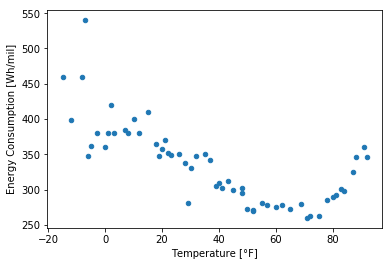

In [5]:
# Extract x, y data
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.show()

As you can see, electric cars consume more energy during cold weather. The optimal consumption is around 70°F (21°C) and then increases with warmer temperatures.

We can use a polynomial to model the relationship between the two variables. Let's see how to do that with Scikit-learn.

### Create the polynomial features
Scikit-learn implements a PolynomialFeatures object to build the polynomial features. Note that it's considered as a preprocessing step because it's done before fitting the model.

In [6]:
from sklearn.preprocessing import PolynomialFeatures


In the Scikit-learn jargon, this object is a **preprocessor** which means that it implements the fit() and transform() functions.

Here is the code to create the polynomial features that correspond to a polynomial of degree 2.

In [7]:
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis] # (57,) -> (57,1)
)

print('Shape:', X2.shape) # (57, 3)

Shape: (57, 3)


We start by creating the PolynomialFeatures object and set its degree with the degree parameter. Then, we obtain the features by passing the input data to its fit_transform() function which is a shortcut for the fit() and transform() ones.

In [8]:
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

In this code, fit() computes the number of output features and transform() creates them. Again, Scikit-learn works with 2-dimensional Numpy arrays, and we need to add a dimension to x using the x[:, np.newaxis] syntax.

Scikit-learn labels each new feature in X2, and we can obtain these labels with the get_feature_names() function.

In [9]:
# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)
# Prints: ['1', 'x0', 'x0^2']

Features: ['1', 'x0', 'x0^2']


Here, x0 denotes temperatures. As we can see, Scikit-learn adds a 1 to the polynomial features which corresponds to the intercept term. However, we will use the LinearRegression object which already fits one. Hence, this new feature is not necessary and we can remove it by setting the include_bias parameter to False.

In [10]:
# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)
# Prints: ['x0', 'x0^2']

Features: ['x0', 'x0^2']


**It's also possible to create the new set of features manually with the Numpy c_ object.**

In [11]:
# Create the polynomial features manually
X2 = np.c_[x, x**2]

### Fit a linear regression

In [12]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y);

In [13]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

Note that we need to create the polynomial features for these x_values with the transform() function. Again, you can also use the Numpy c_ object.

In [14]:
X_values2 = np.c_[x_values, x_values**2]

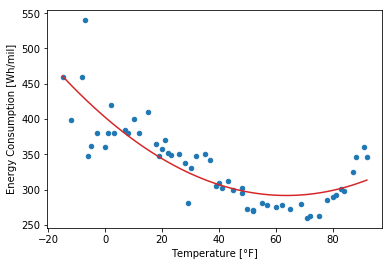

In [15]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3')
plt.show()

The model captures the main trend but doesn't fit well the data. You can try to increase the degree of the set of polynomial features. We leave it to you as an exercise. Here is the result for degrees 3, 5 and 10.

It seems that the curve gets more complex when we increase the degree which can lead to overfitting. Large degrees might result in models that fit the noise in the data rather than the signal. In our example, the degree five seems to generalize well from the data.

### Summary

In this unit, we learned how to build a set of polynomial features with Scikit-learn and Numpy, and saw that large degrees can lead to overfitting. In the next unit, we will see how to detect models that overfit using the train/test sets methodology.

# Detect models that overfit

In the last unit, we saw that it's easy to build models that overfit. A simple way to identify such models is to split the data into train/test sets. Let's see how this works.

Let's fit two models to the following set of 18 x/y data points. One is a simple linear regression and the other is a polynomial regression of degree 9.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3727/overfitting-models1.svg

We can see on the plots that the line fits better the data points than the polynomial. In practice, we usually work with data sets with many features, and it's not possible to detect overfitting by plotting the data.

**Also, printing the loss value can be misleading. For instance, here are the MSE scores of these two models.**

MSE polynomial regression: 1.14
MSE linear regression: 2.39

According to these scores, the polynomial fits better the data points than the line. In fact, the **polynomial regression is overfitting** which means that it fits well the actual data points but will fail to generalize to new data points.

### Train and test sets

One solution is to split the data into two sets.

- We use one to fit our models. This one is called the train set.
- We use the other to simulate unseen data points and evaluate our models. This is the test set.

In practice, we usually **shuffle the data points before splitting** them because we want to avoid having train/test sets that don't represent well the data. For our example, we take 10 points for the train set the other 8 for the test set.

Let's fit the two models again using the train set.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3729/overfitting-models2.svg

It's interesting to note that the polynomial passes through each data point from the train set. Hence, its MSE score on this set is zero.

Train set
MSE polynomial regression: 0.00
MSE linear regression: 2.93

However, if we evaluate the MSE scores for the test set, we can see that the polynomial has a larger error than the line. This error is an estimation of the generalization error, i.e., the error made on new, unseen data points.

Test set
MSE polynomial regression: 6.01
MSE linear regression: 2.10

By looking at the differences between the train and the test scores, it's clear that the polynomial is overfitting.

### Summary
Let's summarize.

- We can detect models that **overfit by looking at the differences** between the error made on the train and the test sets.
- The error on the test set is an estimation of the generalization error.

In the next unit, we will work with the electric car consumption data set. We will split the data into train/test sets with Numpy and Scikit-learn, and use them to compare two polynomials of different degrees.

# Splitting data

In [18]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-cars.csv')

# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In [19]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print('indexes:', indexes) # [0 1 2 3 4 ..]

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [20]:
# Split into train/test indexes
split_idx = int(n*0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print('train indexes:', train_idx) # [0 1 2 ..]
print('test indexes:', test_idx) # [39 40 41 ..]

train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


In [21]:
# Extract x, y data
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

print('train:', x_tr.shape, y_tr.shape) # (39,) (39,)
print('test:', x_te.shape, y_te.shape) # (18,) (18,)

train: (39,) (39,)
test: (18,) (18,)


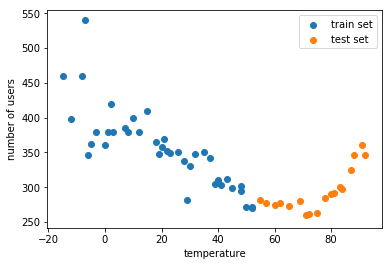

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend()
plt.show()

This is a bad split because neither of the sets represents well the entire data. The issue is that the data points are ordered by temperatures in the original .csv file. Hence, when we split the data, the 39 points with the lowest temperatures go into the train set and the remaining 18 into the test set.

### Shuffling the indexes

One solution is to **shuffle the data before splitting it.** In this unit, we will shuffle the list of indexes rather than the data points directly. This has the advantage of leaving the original data unmodified.

To achieve this, we can use the shuffle() function from the Numpy random module.

In [23]:
# shuffle the indexes
np.random.shuffle(indexes)

print('indexes:', indexes) # result depends on the seed

indexes: [33 25 46 24 54 55 37 38 28 10 17 41 19 14  7 53  9 39 44  8 49 26 22 51
 42  0 43 32 27 52 40 56 11  5 50 36 47  3 23 35 21 30 48 29 16 18  6 34
 31  1 45  2 13 20 12 15  4]


In [25]:
# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)   # pour ne plus que ce soit aléatoire à chaque run
np.random.shuffle(indexes)

print('indexes:', indexes)

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


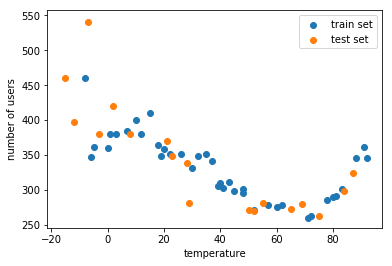

In [26]:
# Split into train/test indexes
split_idx = int(n*0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

# Plot data points
plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend()
plt.show()

### With Scikit-learn

Splitting the data is a common operation in machine learning. For this reason, Scikit-learn implements a train_test_split() function in its model_selection module.

In [27]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0)

In [28]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=39, test_size=18, random_state=0)

**Note that the function also works with two-dimensional arrays and DataFrames. For instance, you will use it in the next exercise to split a data set with multiple features.**

### Model selection

In a previous unit, we fitted a polynomial of degree 5 and another of degree 10 to this data set. Let's see which one has a better generalization error according to our test set.

In [29]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print('Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred5_tr),
    mse(y_te, y_pred5_te)
))
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print('Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred10_tr),
    mse(y_te, y_pred10_te)
))

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


We can see that the polynomial of degree 10 has a better training error than the polynomial of degree 5. However, its test score nearly doubles which means that it's likely **overfitting.** On the other hand, the polynomial of degree 5 seems to generalize well from the data with a test score close to its train score.

### Summary

In this unit, we saw two different ways to split the data into train/test sets.

- Manually, by separating the data points using a list of indexes.
- With the train_test_split() function from Scikit-learn.

In the next exercise, you will work on an extended version of the bike sharing data set with additional polynomial features, and you will use this train/test sets methodology to evaluate your models. This extended data set also contains categorical features. In the next unit, we will see how to preprocess them for linear regressions with **one-hot encoding.**

# One-hot encoding

So far, we worked with variables that are quantitative, e.g., temperatures, wind speed, humidity. But **many data sets also have categorical features**, e.g., the day of the week, season, type of weather. In this unit, we will see how to **preprocess these categorical variables using one-hot encoding.**

In [30]:
import pandas as pd

# Load the data
data_df = pd.read_csv('bike-small.csv')

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


In [31]:
data_df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

Let's do a quick experiment. Let's fit a linear regression with and without this variable and compare the two 
R
2
 coefficients.

In [32]:
# Create X/y data
X = data_df[['temp']].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) # 0.295..

0.29525001840042775

In [33]:
# Create X/y data
X = data_df[['temp', 'weekday']].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) # 0.298..

0.2988588081409287

**We can see that the two 
R
2
 coefficients are very close and that the weekday variable isn't really useful** in its current format. However, there is a more appropriate way to encode this variable: one-hot encoding.

### One-hot encoding

The idea is to create a new variable for each possible value. In our example, we create a variable for each day of the week which indicates whether the measurement was made that day. **It's called one-hot encoding because only one variable from the seven can be positive at a time.** These indicators are also called dummy variables.

Pandas implements a get_dummies() function to create the dummies.

In [34]:
pd.get_dummies(data_df, columns=['weekday']).head()


,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,0,1
1,0.363,131,1,0,0,0,0,0,0
2,0.196,120,0,1,0,0,0,0,0
3,0.200,108,0,0,1,0,0,0,0
4,0.227,82,0,0,0,1,0,0,0


We can now fit a linear regression using this new encoding.

In [35]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'])

# Create X/y data
X = encoded_df.drop(['casual'], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

As we can see, the 
R
2
 coefficient is now close to 0.6 which is much better than the two previous models.
Note that each category now has a redundant column. We can drop it with the drop_first attribute.

In [36]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'], drop_first=True)
encoded_df.head()

,temp,casual,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,1
1,0.363,131,0,0,0,0,0,0
2,0.196,120,1,0,0,0,0,0
3,0.200,108,0,1,0,0,0,0
4,0.227,82,0,0,1,0,0,0


In [37]:
# Create X/y data
X = encoded_df.drop(['casual'], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) #we didn't loose in performance.

0.5969174988134782

### Summary

In this unit, we learned about one-hot encoding and saw how to encode categorical variables with the Pandas library. Note that **one-hot encoding is considered as a preprocessing step** and not as being part of the feature engineering process.

In the next exercise, you will experiment with one-hot encoding and feature engineering using an extended version of the bike sharing data set with categorical features.

Text(0, 0.5, 'Casual')

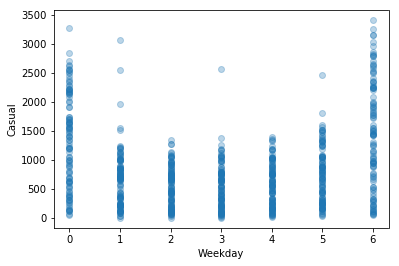

In [38]:
# Plot 'weekday' against the target casual
import matplotlib.pyplot as plt

plt.scatter(data_df['weekday'],data_df['casual'],alpha=0.3);
plt.xlabel('Weekday')
plt.ylabel('Casual')

Model 1: R2=0.004
Model 2: R2=0.274


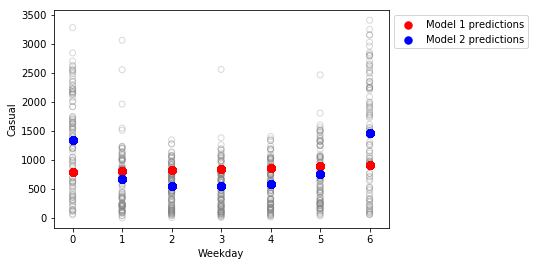

In [40]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data
data_df = pd.read_csv('bike-small.csv')

# Model 1: `weekday` is ordinal

# Create X/y data
X = data_df[['weekday']].values
y = data_df.casual.values

# Fit model
lr1 = LinearRegression()
lr1.fit(X, y)

# Model 2: `weekday` is one-hot encoded

# Apply one-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'], drop_first=True)

# Create X data
X_new = encoded_df.drop(['temp','casual'],axis=1)  # Remove feature 'temp' and the target

# Fit model
lr2 = LinearRegression()
lr2.fit(X_new, y)

# Print R2
print('Model 1: R2={}'.format(np.round(lr1.score(X,y),3)))   # Prints: Model 1: R2=0.004
print('Model 2: R2={}'.format(np.round(lr2.score(X_new,y),3)))  # Prints: Model 2: R2=0.274

# Plot ordinal `weekday` against target
plt.scatter(data_df['weekday'],data_df['casual'], color="none", edgecolor='grey', alpha=0.3, label=None);

# Model 1: Plot predictions
plt.scatter(data_df['weekday'],lr1.predict(X), color="red", s=55, label='Model 1 predictions')

# Model 2: Plot predictions
plt.scatter(data_df['weekday'],lr2.predict(X_new), color="blue", s=55, label='Model 2 predictions')

plt.xlabel('Weekday')
plt.ylabel('Casual')

plt.legend(bbox_to_anchor=(1,1));